In [5]:
from utils import get_current_dir
import pandas as pd

inputpath = get_current_dir().parent / "data" / "artvis_cleaned.csv"
df = pd.read_csv(inputpath)

df = df.replace("null", pd.NA)
display(df.head())


df["a.id"] = df["a.id"].astype("Int64")
df = df.dropna(subset=["a.id"])

df["a.firstname"] = df["a.firstname"].astype("string")
df["a.firstname"] = df["a.firstname"].fillna("Unknown Firstname")

df["a.lastname"] = df["a.lastname"].astype("string")
df["a.lastname"] = df["a.lastname"].fillna("Unknown Lastname")

df["a.gender"] = pd.Categorical(df["a.gender"]).add_categories("Unknown Gender")
df["a.gender"] = df["a.gender"].fillna("Unknown Gender")

df["a.birthdate"] = pd.to_datetime(df["a.birthdate"], errors="coerce")

df["a.deathdate"] = pd.to_datetime(df["a.deathdate"], errors="coerce")

df["a.birthplace"] = df["a.birthplace"].astype("string")
df["a.birthplace"] = df["a.birthplace"].fillna("Unknown Birthplace")

df["a.deathplace"] = df["a.deathplace"].astype("string")
df["a.deathplace"] = df["a.deathplace"].fillna("Unknown Deathplace")

df["a.nationality"] = df["a.nationality"].astype("string")
df["a.nationality"] = df["a.nationality"].fillna("Unknown Nationality")

df["e.id"] = df["e.id"].astype("Int64")
df = df.dropna(subset=["e.id"])

df["e.title"] = df["e.title"].astype("string")
df["e.title"] = df["e.title"].fillna("Unknown Title")

df["e.venue"] = df["e.venue"].astype("string")
df["e.venue"] = df["e.venue"].fillna("Unknown Venue")

df["e.startdate"] = df["e.startdate"].astype("Int64")
df["e.startdate"] = df["e.startdate"].fillna(0)

df["e.type"] = pd.Categorical(df["e.type"]).add_categories("Unknown Type")
df["e.type"] = df["e.type"].fillna("Unknown Type")

df["e.paintings"] = df["e.paintings"].astype("Int64")
df["e.paintings"] = df["e.paintings"].fillna(0)

df["e.country"] = df["e.country"].astype("string")
df["e.country"] = df["e.country"].fillna("Unknown Country")

df["e.city"] = df["e.city"].astype("string")
df["e.city"] = df["e.city"].fillna("Unknown City")

df["e.latitude"] = df["e.latitude"].astype("float64")
df["e.latitude"] = df["e.latitude"].fillna(0)

df["e.longitude"] = df["e.longitude"].astype("float64")
df["e.longitude"] = df["e.longitude"].fillna(0)


print(df.head())
for col in df.columns:
    print(f"column: {col}, type: {df[col].dtype}, unique values: {df[col].nunique()}, null values: {df[col].isnull().sum()}")

,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
0,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,618,Exhibition of the Camden Town Group and Others,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.150000
1,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,720,The Second Exhibition of Works by Members of t...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145
2,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,729,Third Exhibition of Works by Members of the Lo...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145
3,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,650,The First Exhibition of Works by Members of Th...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145
4,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,680,Twentieth Century Art. A Review of Modern Move...,Whitechapel Art Gallery,1914,group,3,GB,London,51.514248,-0.093145


   a.id      a.firstname a.lastname a.gender a.birthdate a.deathdate  \
0     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
1     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
2     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
3     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
4     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   

  a.birthplace a.deathplace a.nationality  e.id  \
0       London       London            GB   618   
1       London       London            GB   720   
2       London       London            GB   729   
3       London       London            GB   650   
4       London       London            GB   680   

                                             e.title                  e.venue  \
0     Exhibition of the Camden Town Group and Others     Public Art Galleries   
1  The Second Exhibition of Works by Members of t...           Goupil Gallery   
2  Third Exhibiti

In [6]:
outputpath = get_current_dir().parent / "pages"

# Plotnine

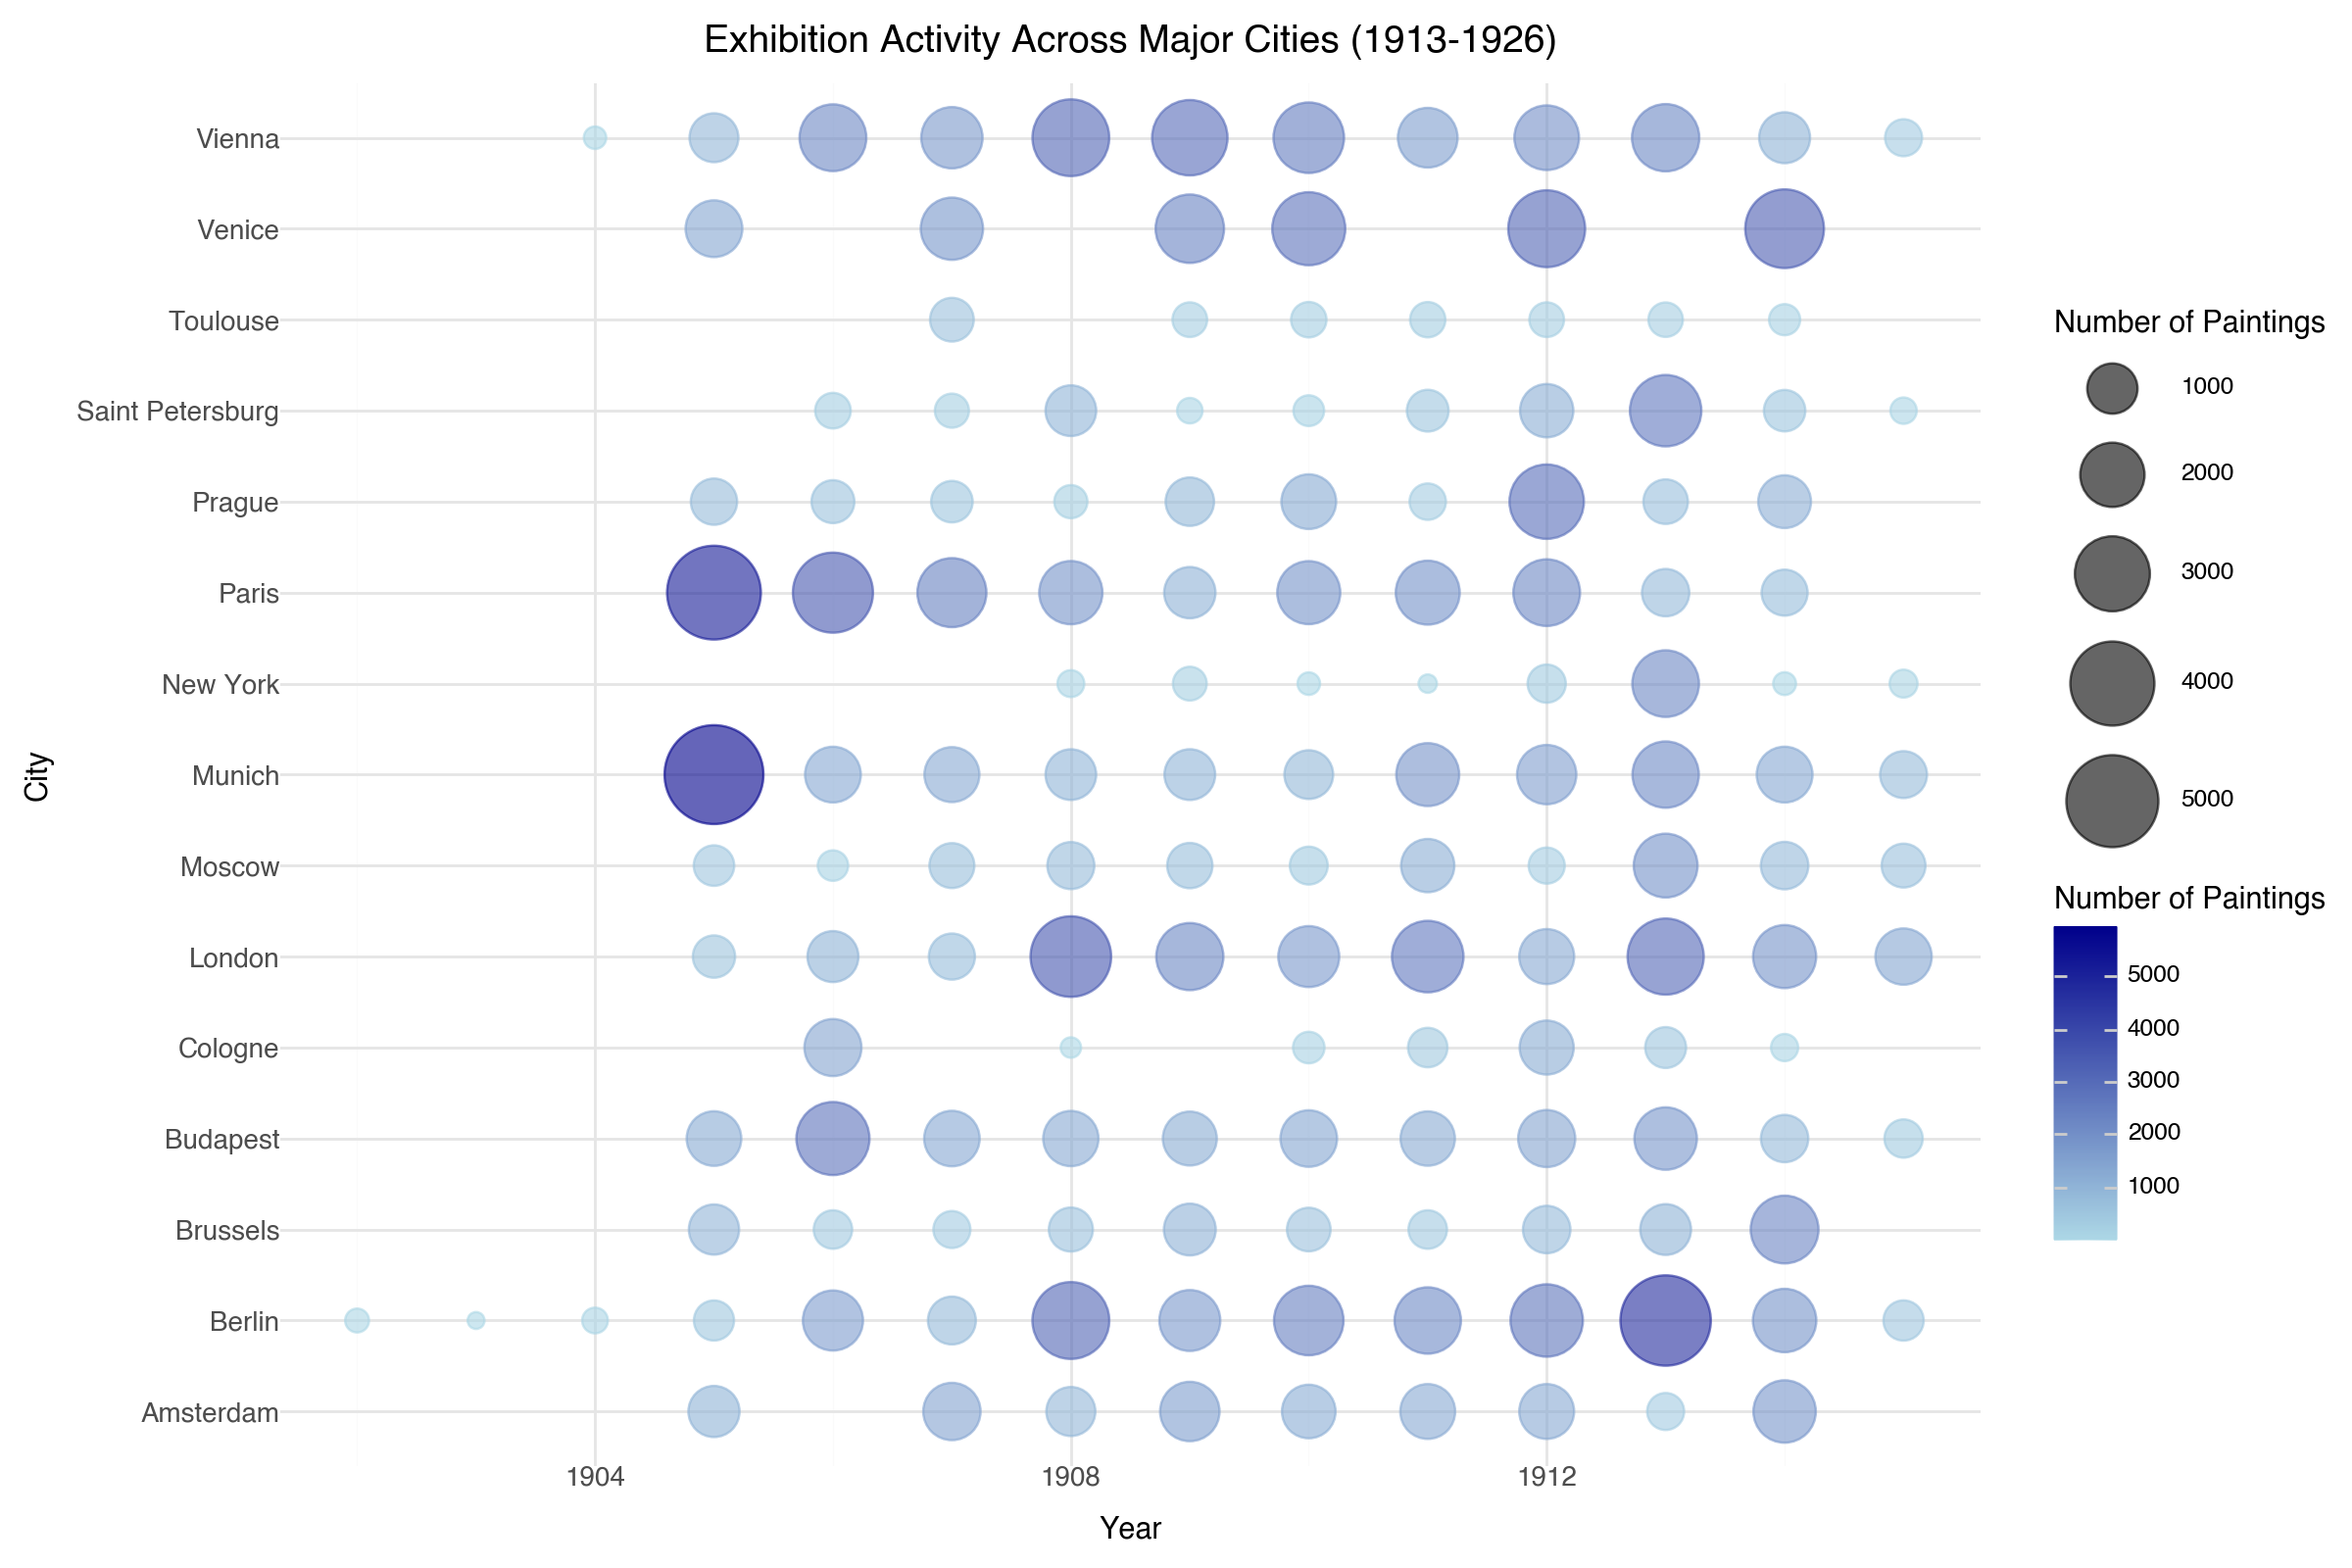

In [16]:
from plotnine import *
import pandas as pd
import numpy as np

summary_df = df.groupby(["e.city", "e.startdate"]).agg({"e.paintings": "sum", "e.latitude": "first", "e.longitude": "first"}).reset_index().sort_values("e.paintings", ascending=False)

top_cities = summary_df.groupby("e.city")["e.paintings"].sum().sort_values(ascending=False).head(15).index

plot_df = summary_df[summary_df["e.city"].isin(top_cities)]

(ggplot(plot_df, aes(x="e.startdate", y="e.city", size="e.paintings", color="e.paintings")) + geom_point(alpha=0.6) + scale_size_continuous(range=(3, 20), name="Number of Paintings") + scale_color_gradient(low="lightblue", high="darkblue", name="Number of Paintings") + theme_minimal() + labs(title="Exhibition Activity Across Major Cities (1913-1926)", x="Year", y="City") + theme(figure_size=(12, 8), plot_title=element_text(size=14), axis_text=element_text(size=10), legend_position="right"))

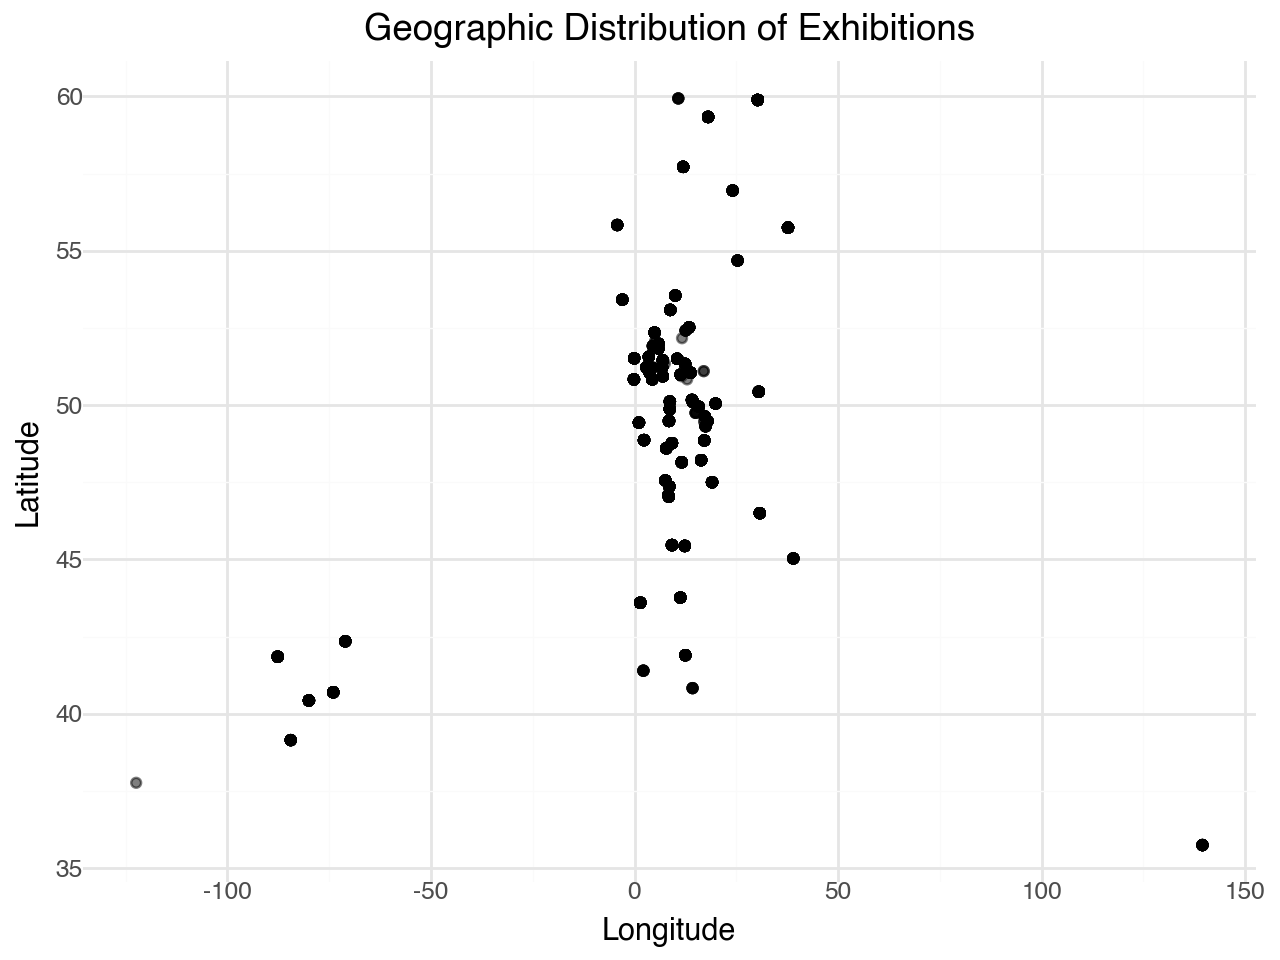

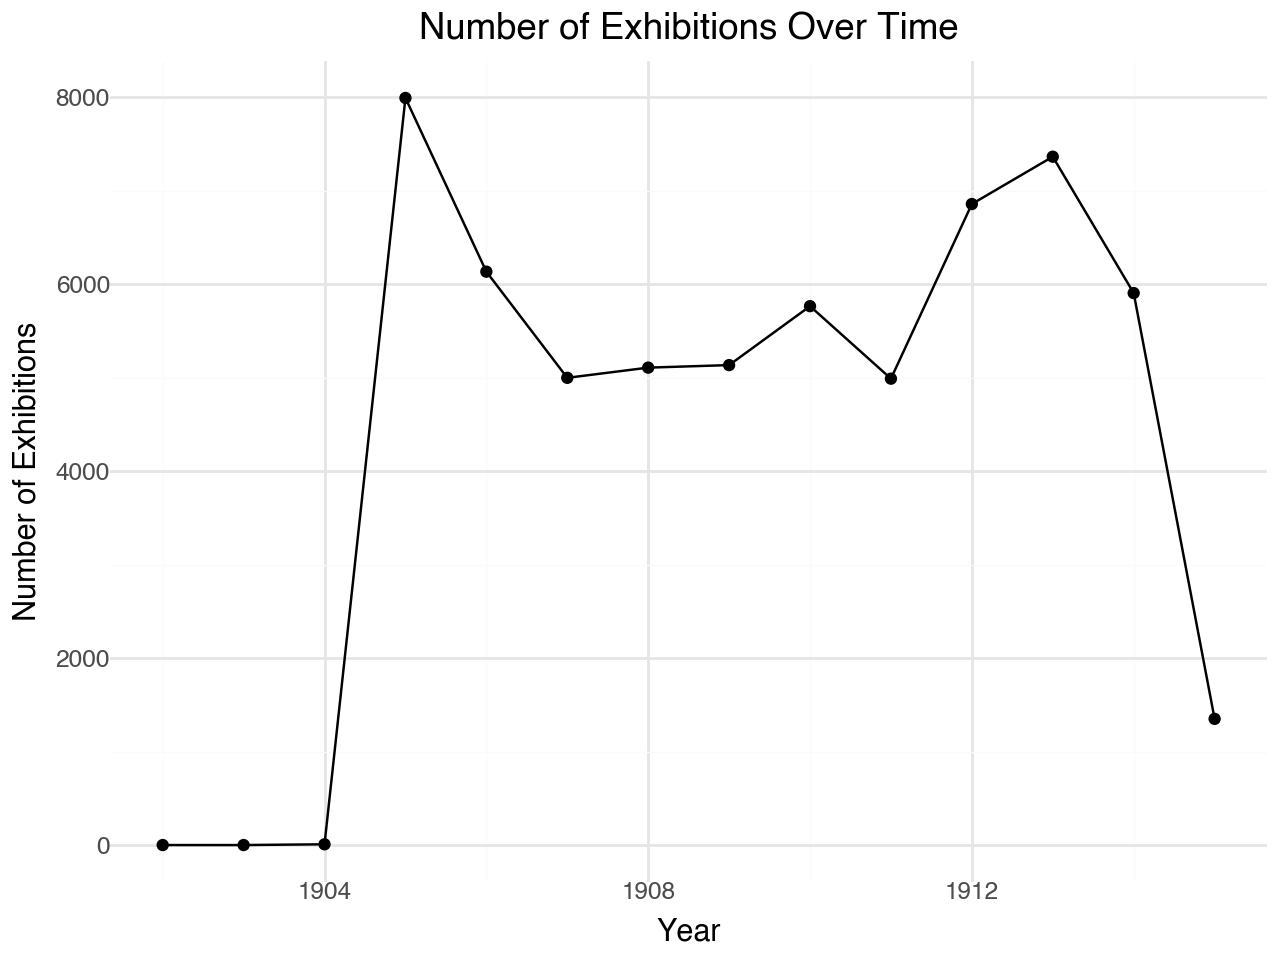

In [19]:
from plotnine import *
import pandas as pd
import numpy as np


p4 = ggplot(df[df["e.longitude"] != 0], aes(x="e.longitude", y="e.latitude")) + geom_point(alpha=0.5) + theme_minimal() + labs(title="Geographic Distribution of Exhibitions", x="Longitude", y="Latitude")

df["year"] = pd.to_numeric(df["e.startdate"])
yearly_counts = df.groupby("year").size().reset_index(name="count")

p5 = ggplot(yearly_counts, aes(x="year", y="count")) + geom_line() + geom_point() + theme_minimal() + labs(title="Number of Exhibitions Over Time", x="Year", y="Number of Exhibitions")

p4.show()
p5.show()